In [1]:
import numpy as np
import torch
import matplotlib.pylab as pl
import ot
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss
from MIOFlow.losses import density_specified_OT_loss

In [2]:
n1 = 20  # nb samples
n2 = 20  # nb samples
n12 = 20  # nb samples

mu_s = np.array([-1, -1])
cov_s = np.array([[1, 0], [0, 1]])

mu_t = np.array([-1, -1])
cov_t = np.array([[1, 0], [0, 1]])

mu_s2 = np.array([4, 4])
cov_s2 = np.array([[1, 0], [0, 1]])

np.random.seed(0)
xs = ot.datasets.make_2D_samples_gauss(n1, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n2, mu_t, cov_t)
xs2 = ot.datasets.make_2D_samples_gauss(n12, mu_s2, cov_s2)

xs = np.concatenate((xs, xs2), axis=0)

n_noise = 0

xs = np.concatenate((xs, ((np.random.rand(n_noise, 2) - 4))), axis=0)
xt = np.concatenate((xt, ((np.random.rand(n_noise, 2) + 6))), axis=0)

xs = torch.tensor(xs, dtype=torch.float32, requires_grad=True)
xt = torch.tensor(xt, dtype=torch.float32, requires_grad=False)

n1 = n1 + n12 + n_noise
n2 = n2 + n_noise

a, b = np.ones((n1,)), np.ones((n2,))  # uniform distribution on samples

a = torch.tensor(a, dtype=torch.float32, requires_grad=True)
b = torch.tensor(b, dtype=torch.float32, requires_grad=True)

# loss matrix
# M = ot.dist(xs, xt)
M = torch.cdist(xs, xt)
# M /= M.max()



In [3]:
M2 = ot.dist(xs, xt)

In [4]:
torch.isclose(M,M2).all()

tensor(False)

In [5]:
reg = 0.005
reg_m_kl = 0.05
reg_m_l2 = 5
mass = 0.7

# loss = ot.unbalanced.mm_unbalanced2(a, b, M, reg_m_kl, div='kl')
# loss = ot.emd2(a, b, M)
# loss = ot.sinkhorn2(a, b, M, 0.5, verbose=False)
loss_func = density_specified_OT_loss(reg=0.5, take_softmax=True)
loss = loss_func(xs, xt, a)
Gs = ot.sinkhorn(a, b, M, 0.5, verbose=False)
# loss = ot.unbalanced.sinkhorn_unbalanced2(a, b, M, reg, reg_m_kl)
# Gs = ot.unbalanced.sinkhorn_knopp_unbalanced(a, b, M, reg, reg_m_kl)
# loss = (Gs * M).sum()
loss.backward()
# emd_ot = ot.emd(a, b, M)
# entropic_kl_uot = ot.unbalanced.sinkhorn_unbalanced(a, b, M, reg, reg_m_kl)
# kl_uot = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_kl, div='kl')
# l2_uot = ot.unbalanced.mm_unbalanced(a, b, M, reg_m_l2, div='l2')

/Users/xingzhi/micromamba/envs/dmae/lib/python3.11/site-packages/ot/bregman/_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 109
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


In [6]:
# loss_emd = (emd_ot * M).sum()
# loss_ent_kl = (entropic_kl_uot * M).sum()
# loss_kl_uot = (kl_uot * M).sum()
# loss_l2_uot = (l2_uot * M).sum()

In [7]:
# loss_emd.backward()
# loss_ent_kl.backward()
# loss_kl_uot.backward()

In [8]:
loss

tensor(4.8702, grad_fn=<SumBackward0>)

In [9]:
a.grad

tensor([-0.0630, -0.0491, -0.0745, -0.0857, -0.0988, -0.0766, -0.0875, -0.0904,
        -0.0747, -0.1038, -0.0984, -0.0920, -0.0654, -0.1033, -0.0531, -0.0954,
        -0.1321, -0.1060, -0.0630, -0.1131,  0.0648,  0.0546,  0.1285,  0.0888,
         0.0692,  0.0834,  0.0897,  0.0877,  0.1007,  0.0783,  0.0868,  0.0643,
         0.0842,  0.0492,  0.1295,  0.1191,  0.0886,  0.0782,  0.0847,  0.0960])

In [10]:
xs.grad

tensor([[ 0.0216,  0.0108],
        [ 0.0159,  0.0184],
        [ 0.0242,  0.0074],
        [ 0.0208,  0.0081],
        [ 0.0106,  0.0139],
        [ 0.0150,  0.0187],
        [ 0.0212,  0.0083],
        [ 0.0186,  0.0117],
        [ 0.0209,  0.0093],
        [ 0.0179,  0.0028],
        [-0.0217,  0.0119],
        [ 0.0205,  0.0053],
        [ 0.0250, -0.0024],
        [ 0.0174,  0.0113],
        [ 0.0186,  0.0161],
        [ 0.0192,  0.0130],
        [-0.0029, -0.0241],
        [ 0.0130,  0.0167],
        [ 0.0185,  0.0160],
        [ 0.0208,  0.0129],
        [ 0.0166,  0.0184],
        [ 0.0206,  0.0140],
        [ 0.0180,  0.0171],
        [ 0.0197,  0.0153],
        [ 0.0165,  0.0185],
        [ 0.0170,  0.0181],
        [ 0.0177,  0.0174],
        [ 0.0181,  0.0171],
        [ 0.0169,  0.0182],
        [ 0.0181,  0.0170],
        [ 0.0214,  0.0128],
        [ 0.0164,  0.0186],
        [ 0.0158,  0.0191],
        [ 0.0188,  0.0163],
        [ 0.0187,  0.0164],
        [ 0.0192,  0

In [11]:
grads0 = a.grad.detach().numpy()

In [12]:
grads0

array([-0.06303844, -0.04911689, -0.07450734, -0.08570167, -0.0988462 ,
       -0.07662417, -0.08754171, -0.09037352, -0.07473822, -0.10375909,
       -0.09837636, -0.0920252 , -0.06543332, -0.1033043 , -0.05313843,
       -0.09544502, -0.13212632, -0.10599361, -0.06304325, -0.11308763,
        0.06477342,  0.05456247,  0.12845322,  0.08882292,  0.06916764,
        0.08343176,  0.08967336,  0.08766381,  0.10066815,  0.07831932,
        0.08682884,  0.06430341,  0.08423091,  0.04921677,  0.12947094,
        0.11913507,  0.08858011,  0.07823759,  0.08467627,  0.09600454],
      dtype=float32)

In [13]:
xs.grad

tensor([[ 0.0216,  0.0108],
        [ 0.0159,  0.0184],
        [ 0.0242,  0.0074],
        [ 0.0208,  0.0081],
        [ 0.0106,  0.0139],
        [ 0.0150,  0.0187],
        [ 0.0212,  0.0083],
        [ 0.0186,  0.0117],
        [ 0.0209,  0.0093],
        [ 0.0179,  0.0028],
        [-0.0217,  0.0119],
        [ 0.0205,  0.0053],
        [ 0.0250, -0.0024],
        [ 0.0174,  0.0113],
        [ 0.0186,  0.0161],
        [ 0.0192,  0.0130],
        [-0.0029, -0.0241],
        [ 0.0130,  0.0167],
        [ 0.0185,  0.0160],
        [ 0.0208,  0.0129],
        [ 0.0166,  0.0184],
        [ 0.0206,  0.0140],
        [ 0.0180,  0.0171],
        [ 0.0197,  0.0153],
        [ 0.0165,  0.0185],
        [ 0.0170,  0.0181],
        [ 0.0177,  0.0174],
        [ 0.0181,  0.0171],
        [ 0.0169,  0.0182],
        [ 0.0181,  0.0170],
        [ 0.0214,  0.0128],
        [ 0.0164,  0.0186],
        [ 0.0158,  0.0191],
        [ 0.0188,  0.0163],
        [ 0.0187,  0.0164],
        [ 0.0192,  0

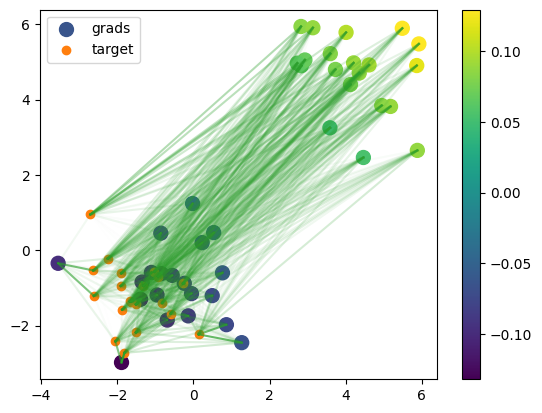

([], [])

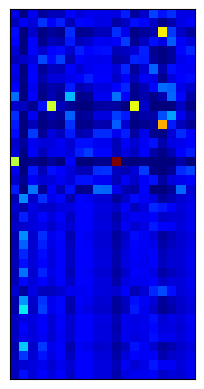

In [14]:
grads = grads0
xs = xs.detach()
xt = xt.detach()
P = Gs.detach().numpy()
if P.sum() > 0:
    P = P / P.max()
for i in range(n1):
    for j in range(n2):
        if P[i, j] > 0:
            pl.plot([xs[i, 0], xt[j, 0]], [xs[i, 1], xt[j, 1]], color='C2',
                    alpha=P[i, j])
# pl.scatter(xs[:, 0], xs[:, 1], c='C0', alpha=1, label='source')
scatter = pl.scatter(xs[:, 0], xs[:, 1], c=grads, alpha=1, s=100, label='grads')
pl.scatter(xt[:, 0], xt[:, 1], c='C1', alpha=1, label='target')
pl.legend()
pl.colorbar(scatter)
pl.show()
# pl.scatter(xs[:, 0], xs[:, 1], c='C0', s=P.sum(1).ravel() * (1 + p) * 2)
# pl.scatter(xt[:, 0], xt[:, 1], c='C1', s=P.sum(0).ravel() * (1 + p) * 2)
pl.yticks(())
pl.xticks(())
pl.imshow(P, cmap='jet')
pl.yticks(())
pl.xticks(())

In [15]:
grads

array([-0.06303844, -0.04911689, -0.07450734, -0.08570167, -0.0988462 ,
       -0.07662417, -0.08754171, -0.09037352, -0.07473822, -0.10375909,
       -0.09837636, -0.0920252 , -0.06543332, -0.1033043 , -0.05313843,
       -0.09544502, -0.13212632, -0.10599361, -0.06304325, -0.11308763,
        0.06477342,  0.05456247,  0.12845322,  0.08882292,  0.06916764,
        0.08343176,  0.08967336,  0.08766381,  0.10066815,  0.07831932,
        0.08682884,  0.06430341,  0.08423091,  0.04921677,  0.12947094,
        0.11913507,  0.08858011,  0.07823759,  0.08467627,  0.09600454],
      dtype=float32)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

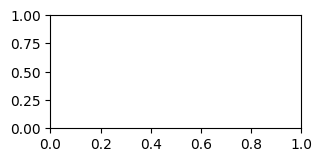

In [16]:

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'UOT matrix Sinkhorn')

pl.show()

In [ ]:
pl.figure(4, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.fill(x, Gs.sum(1), 'b', alpha=0.5, label='Transported source')
pl.fill(x, Gs.sum(0), 'r', alpha=0.5, label='Transported target')
pl.legend(loc='upper right')
pl.title('Distributions and transported mass for UOT')

NameError: name 'x' is not defined

<Figure size 640x300 with 0 Axes>